<a href="https://colab.research.google.com/github/parthnaik13/NYRA/blob/main/3_1_Data_Prep.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Prep for NYRA Analytics

https://www.kaggle.com/competitions/big-data-derby-2022/overview

This notebook aims to load prepped NYRA data so that the prepped data can be directly imported into subsequent notebooks which would be aimed towards exploring different directions (load management)

## Plan

* Load the NYRA complete data
* Join this data with this [dataset](https://www.kaggle.com/datasets/themarkgreen/big-data-derby-2022-global-horse-ids-and-places) to obtain unique horse ids, horse names and finish positions for horses in races
* Save out NYRA competition data + the supplemental NYRA horse data
* Extract avg speeds for the horse races using code found in this [notebook](https://www.kaggle.com/code/roniheka/obtain-time-course-of-speed-during-a-race)
* Save out NYRA horse race data having
  * Horse id
  * Horse name
  * Race finish position
  * Avg race speed

  for each race (track_id, race_date, race_number) 


## Setup

Load necessary libraries and datasets

Assign appropriate dtypes to columns

In [1]:
# Mount google drive to access data files
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# Import necessary libs and print out their versions
import numpy as np
np.random.seed(7)

import pandas as pd
pd.set_option('display.max_columns', None) # Display all dataframe columns

import matplotlib
import matplotlib.pyplot as plt

print(f'numpy version - {np.__version__}')
print(f'pandas version - {pd.__version__}')
print(f'matplotlib version - {matplotlib.__version__}')

numpy version - 1.21.6
pandas version - 1.3.5
matplotlib version - 3.2.2


## Prepare & save NYRA data
* Load nyra_2019_complete.csv, analyze & fix dtypes
* Load horse_ids.csv and horse_names.csv, analyze & fix dtypes
* Join 1 & 2
* Save out prepped data to google drive

### Load the NYRA complete competition dataset
Load the dataset and assign proper dtypes to cols

In [74]:
# Load the NYRA complete dataset
nyra_complete_df = pd.read_csv('/content/drive/MyDrive/NYRA_Data/nyra_2019_complete.csv')
print(f'Shape of the df - {nyra_complete_df.shape}')
nyra_complete_df.head(5)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


Shape of the df - (5228430, 17)


,track_id,race_date,race_number,program_number,trakus_index,latitude,longitude,distance_id,course_type,track_condition,run_up_distance,race_type,purse,post_time,weight_carried,jockey,odds
0,AQU,2019-01-01,9,6,72,40.672902,-73.827607,600,D,GD,48,CLM,25000,420,120,Andre Shivnarine Worrie,2090
1,AQU,2019-01-01,9,6,73,40.672946,-73.827587,600,D,GD,48,CLM,25000,420,120,Andre Shivnarine Worrie,2090
2,AQU,2019-01-01,9,6,74,40.672990,-73.827568,600,D,GD,48,CLM,25000,420,120,Andre Shivnarine Worrie,2090
3,AQU,2019-01-01,9,6,63,40.672510,-73.827781,600,D,GD,48,CLM,25000,420,120,Andre Shivnarine Worrie,2090
4,AQU,2019-01-01,9,6,64,40.672553,-73.827762,600,D,GD,48,CLM,25000,420,120,Andre Shivnarine Worrie,2090


In [75]:
# Assign proper dtypes wherever needed
# race_date as datetime col
nyra_complete_df['race_date'] = pd.to_datetime(nyra_complete_df['race_date'])
# race_number as a int/numeric col
nyra_complete_df['race_number'] = pd.to_numeric(nyra_complete_df['race_number'])
# post_time as a datetime col
nyra_complete_df['post_time'] = pd.to_datetime(nyra_complete_df['post_time'], format= '%H%M')

### Load the supplementary NYRA dataset
* Load horse_ids.csv and horse_names.csv
* Assign proper dtypes to horse_ids.csv and horse_names.csv
* Explore the files (since they were not explored in the EDA notebook)
* Join the 2 dataframes to create a single horse information df

In [76]:
# Load horse_id data
# This is the additioal data found https://www.kaggle.com/datasets/themarkgreen/big-data-derby-2022-global-horse-ids-and-places?select=horse_ids.csv
# This data contains unique horse_ids for track_id, race_date, race_number, program_number mappings
# Also contains finish positions of horses
nyra_horse_id_df = pd.read_csv('/content/drive/MyDrive/NYRA_Data/horse_ids.csv', index_col = 0)
print(f'Shape of the df - {nyra_horse_id_df.shape}')
nyra_horse_id_df.head(5)

Shape of the df - (14916, 6)


,track_id,race_date,race,program_number,horse_id,finishing_place
0,AQU,2019-01-01,1,5,0,1
1,AQU,2019-01-01,1,1,1,2
2,AQU,2019-01-01,1,2,2,3
3,AQU,2019-01-01,1,3,3,4
4,AQU,2019-01-01,1,4,4,5


In [77]:
# Check for nulls, since this is a new dataset
nyra_horse_id_df.isnull().sum()

track_id           0
race_date          0
race               0
program_number     0
horse_id           0
finishing_place    0
dtype: int64

In [78]:
# Look at the dtypes, since this is a new dataset
nyra_horse_id_df.dtypes

track_id           object
race_date          object
race                int64
program_number     object
horse_id            int64
finishing_place     int64
dtype: object

In [79]:
# Format dataframe
# Make the race col consistent with the race_number used in the Kaggle datasets
nyra_horse_id_df = nyra_horse_id_df.rename(columns={'race':'race_number'})
# race_date as a datetime
nyra_horse_id_df['race_date'] = pd.to_datetime(nyra_horse_id_df['race_date'])

In [80]:
# Number of unique horse_ids in this dataset
# There are 4638 horses participating in these races as opposed to the 20 we get by grouping on the program number
len(nyra_horse_id_df['horse_id'].unique())

4638

count    4638.000000
mean        3.216041
std         2.706055
min         1.000000
25%         1.000000
50%         2.000000
75%         4.000000
max        21.000000
Name: race_count, dtype: float64


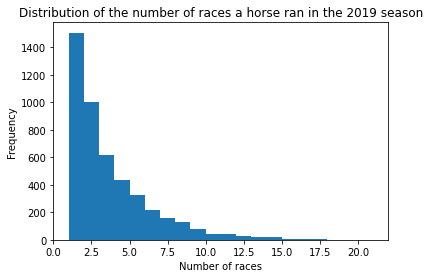

In [81]:
# Look at the distribution of the # of races run by these horses
temp = nyra_horse_id_df.groupby(['horse_id']).size().reset_index()
temp = temp.rename(columns={0:'race_count'})
print(temp['race_count'].describe())
# Histogram of the # of races a horse participated in
plt.hist(temp['race_count'], bins = 20)
plt.xlabel('Number of races')
plt.ylabel('Frequency')
plt.title('Distribution of the number of races a horse ran in the 2019 season')
plt.show()

The above plot for the number of races a horse has in the 2019 season points to horses having pretty low number of races across the year, verify if this is true

`Today's racehorses run an average of seven races per year. The chart at the top of this post is from the Jockey club, the governing body of Thoroughbred racing. - Google`

Given the above, sounds about right

In [82]:
# Load the horse_names dataset which would allow us to get the names for the race horses by horse id
nyra_horse_name_df = pd.read_csv('/content/drive/MyDrive/NYRA_Data/horse_names.csv', index_col = 0)
print(f'Shape of the df - {nyra_horse_name_df.shape}')
nyra_horse_name_df.head(5)

Shape of the df - (4638, 2)


,horse_id,horse_name
0,0,Jc's Shooting Star
1,1,Sounds Delicious
2,2,Crimson Frost
3,3,Friend of Liberty
4,4,Bobby's Song


In [83]:
# Look for nulls, since this a new dataset
nyra_horse_name_df.isnull().sum()

horse_id      0
horse_name    0
dtype: int64

In [84]:
# Look at df dtypes
nyra_horse_name_df.dtypes

horse_id       int64
horse_name    object
dtype: object

In [85]:
# Join horse names to horse id data
nyra_horse_df = nyra_horse_id_df.merge(nyra_horse_name_df, how = 'left', on = 'horse_id')
# Print shape of the df
print(f'Shape of the df - {nyra_horse_df.shape}\n\n')
# Check if nulls are generated as a result of the join
print(nyra_horse_df.isnull().sum())

Shape of the df - (14916, 7)


track_id           0
race_date          0
race_number        0
program_number     0
horse_id           0
finishing_place    0
horse_name         0
dtype: int64


### Join the original data and the supplemental dataset

In [86]:
# Removing leading and trailing whitespaces from program_numbers in nyra_complete_df
# Not doing this leads to a failed join on the nyra_horse_df
nyra_complete_df['program_number'] = [str(i).strip() for i in list(nyra_complete_df['program_number'])]

In [88]:
# Join nyra_complete_df and nyra_horse_df on ['track_id', 'race_date', 'race_number', 'program_number']
nyra_all_df = nyra_complete_df.merge(nyra_horse_df, how = 'left', on = ['track_id', 'race_date', 'race_number', 'program_number'])
print(f'Shape of the df - {nyra_all_df.shape}')
nyra_all_df.head(5)

Shape of the df - (5228430, 20)


,track_id,race_date,race_number,program_number,trakus_index,latitude,longitude,distance_id,course_type,track_condition,run_up_distance,race_type,purse,post_time,weight_carried,jockey,odds,horse_id,finishing_place,horse_name
0,AQU,2019-01-01,9,6,72,40.672902,-73.827607,600,D,GD,48,CLM,25000,1900-01-01 04:20:00,120,Andre Shivnarine Worrie,2090,60,8,Crafty Concorde
1,AQU,2019-01-01,9,6,73,40.672946,-73.827587,600,D,GD,48,CLM,25000,1900-01-01 04:20:00,120,Andre Shivnarine Worrie,2090,60,8,Crafty Concorde
2,AQU,2019-01-01,9,6,74,40.672990,-73.827568,600,D,GD,48,CLM,25000,1900-01-01 04:20:00,120,Andre Shivnarine Worrie,2090,60,8,Crafty Concorde
3,AQU,2019-01-01,9,6,63,40.672510,-73.827781,600,D,GD,48,CLM,25000,1900-01-01 04:20:00,120,Andre Shivnarine Worrie,2090,60,8,Crafty Concorde
4,AQU,2019-01-01,9,6,64,40.672553,-73.827762,600,D,GD,48,CLM,25000,1900-01-01 04:20:00,120,Andre Shivnarine Worrie,2090,60,8,Crafty Concorde


In [89]:
# Check of nulls in the joined df
nyra_all_df.isnull().sum()

track_id           0
race_date          0
race_number        0
program_number     0
trakus_index       0
latitude           0
longitude          0
distance_id        0
course_type        0
track_condition    0
run_up_distance    0
race_type          0
purse              0
post_time          0
weight_carried     0
jockey             0
odds               0
horse_id           0
finishing_place    0
horse_name         0
dtype: int64

### Save the prepped dataframe to drive

In [90]:
# Save out the prepared dataframe to drive
# This df houses the NYRA official data + the NYRA horse data containing unique horse ids, finishing positions and horse names
nyra_all_df.to_csv('/content/drive/MyDrive/NYRA_Data/nyra_all.csv')

### Free up mem by removing dfs that are not required

In [122]:
del nyra_complete_df
del nyra_horse_df
del nyra_horse_id_df
del nyra_horse_name_df

## Extract avg race speeds using reference notebook

https://www.kaggle.com/code/roniheka/obtain-time-course-of-speed-during-a-race

### Load prepped NYRA data

In [10]:
# Load prepped dataframe
nyra_all_df = pd.read_csv('/content/drive/MyDrive/NYRA_Data/nyra_all.csv', index_col = 0)
print(f'Shape of the df - {nyra_all_df.shape}')
nyra_all_df.head(5)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (4) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


Shape of the df - (5228430, 20)


,track_id,race_date,race_number,program_number,trakus_index,latitude,longitude,distance_id,course_type,track_condition,run_up_distance,race_type,purse,post_time,weight_carried,jockey,odds,horse_id,finishing_place,horse_name
0,AQU,2019-01-01,9,6,72,40.672902,-73.827607,600,D,GD,48,CLM,25000,1900-01-01 04:20:00,120,Andre Shivnarine Worrie,2090,60,8,Crafty Concorde
1,AQU,2019-01-01,9,6,73,40.672946,-73.827587,600,D,GD,48,CLM,25000,1900-01-01 04:20:00,120,Andre Shivnarine Worrie,2090,60,8,Crafty Concorde
2,AQU,2019-01-01,9,6,74,40.672990,-73.827568,600,D,GD,48,CLM,25000,1900-01-01 04:20:00,120,Andre Shivnarine Worrie,2090,60,8,Crafty Concorde
3,AQU,2019-01-01,9,6,63,40.672510,-73.827781,600,D,GD,48,CLM,25000,1900-01-01 04:20:00,120,Andre Shivnarine Worrie,2090,60,8,Crafty Concorde
4,AQU,2019-01-01,9,6,64,40.672553,-73.827762,600,D,GD,48,CLM,25000,1900-01-01 04:20:00,120,Andre Shivnarine Worrie,2090,60,8,Crafty Concorde


In [11]:
# Assign proper dtypes wherever needed
# race_date as datetime col
nyra_all_df['race_date'] = pd.to_datetime(nyra_all_df['race_date'])
# race_number as a int/numeric col
nyra_all_df['race_number'] = pd.to_numeric(nyra_all_df['race_number'])
# post_time as a datetime col
nyra_all_df['post_time'] = pd.to_datetime(nyra_all_df['post_time'])

### Setup the speed calculation function

In [12]:
# Install and pymap 3d
!pip install pymap3d
import pymap3d as pm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [19]:
def calculate_avg_race_speed(race_horse_df):
  """
  Function to calculate avg race speeds from the tracking data for a horse for a race
  Input: Latitude, longtitude for a horse in a race (['track_id', 'race_date', 'race_number', 'program_number']) sorted by trakus_id
  Output: Avg race speed
  """
  dtime = 0.25 #0.25 second per trakus_index according to the data description.

  #Elevations obtained from google earth
  if race_horse_df['track_id'].iloc[0] == "AQU":
    elevation = 3
  elif race_horse_df['track_id'].iloc[0] == "BEL":
    elevation = 20
  elif race_horse_df['track_id'].iloc[0] == "SAR":
    elevation = 93
  
  ecef = np.array(pm.geodetic2ecef(race_horse_df["latitude"].values, race_horse_df["longitude"].values, np.array([elevation]*race_horse_df.shape[0]))).T

  # Calculate speed [km/h]
  v_ecef = np.sqrt(np.sum(np.diff(ecef,axis=0) ** 2, axis = 1)) * 3.6 / dtime
  # group["time"] = group["trakus_index"] * dtime -  dtime
  # group["speed"] = np.insert(v_ecef, 0, 0)
  # target_trackings.append(group)
  
  # Avg race speed
  avg_race_speed = np.mean(v_ecef)
  avg_race_speed = avg_race_speed * 0.6213 # Convert to mph
  
  return avg_race_speed

### Get avg speeds of horses across races

In [36]:
# Get avg speeds for horses across races
nyra_all_df = nyra_all_df.sort_values('trakus_index', ascending = True)
# Apply the calculate avg race speed 
res = nyra_all_df.groupby(['track_id', 'race_date', 'race_number', 'program_number']).apply(calculate_avg_race_speed).reset_index().rename(columns = {0:'avg_race_speed'})
res.head(5)

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3441: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


,track_id,race_date,race_number,program_number,avg_race_speed
0,AQU,2019-01-01,1,3,40.323190
1,AQU,2019-01-01,1,4,40.437696
2,AQU,2019-01-01,1,5,41.286390
3,AQU,2019-01-01,1,1,40.898308
4,AQU,2019-01-01,1,2,40.441267


In [37]:
# Check for nulls
res.isnull().sum()

track_id          0
race_date         0
race_number       0
program_number    0
avg_race_speed    1
dtype: int64

In [38]:
# The one null value is for the following race-horse combination
# nyra_all_df.loc[
#     (nyra_all_df['track_id'] == 'BEL') &
#     (nyra_all_df['race_date'] == pd.to_datetime('2019-10-16')) &
#     (nyra_all_df['race_number'] == 4) &
#     (nyra_all_df['program_number'] == '2'),
#     :
# ]
# This combination has just 1 trakus entry for the horse for the race which leads to the null speed calculation
res = res.dropna(axis = 0)
res.isnull().sum()

track_id          0
race_date         0
race_number       0
program_number    0
avg_race_speed    0
dtype: int64

### Prepare a race-horse dataframe
Df has race characteristics, paticipating horse details and their avg speeds (we don't want the tracking data in this dataframe)

In [43]:
# Get race-horse specific rows
nyra_race_horse_df = nyra_all_df.groupby(['track_id', 'race_date', 'race_number', 'program_number']).first().reset_index()
# Drop the tracking columns
nyra_race_horse_df = nyra_race_horse_df.drop(['trakus_index', 'latitude', 'longitude'], axis = 1)
print(f'Shape of the df - {nyra_race_horse_df.shape}')
nyra_race_horse_df.head(5)

Shape of the df - (15081, 17)


,track_id,race_date,race_number,program_number,distance_id,course_type,track_condition,run_up_distance,race_type,purse,post_time,weight_carried,jockey,odds,horse_id,finishing_place,horse_name
0,AQU,2019-01-01,1,3,650,D,MY,36,AOC,80000,1900-01-01 12:20:00,118,Jose Lezcano,180,3,4,Friend of Liberty
1,AQU,2019-01-01,1,4,650,D,MY,36,AOC,80000,1900-01-01 12:20:00,123,Jomar Garcia,1280,4,5,Bobby's Song
2,AQU,2019-01-01,1,5,650,D,MY,36,AOC,80000,1900-01-01 12:20:00,118,Manuel Franco,1150,0,1,Jc's Shooting Star
3,AQU,2019-01-01,1,1,650,D,MY,36,AOC,80000,1900-01-01 12:20:00,123,Dylan Davis,130,1,2,Sounds Delicious
4,AQU,2019-01-01,1,2,650,D,MY,36,AOC,80000,1900-01-01 12:20:00,120,Junior Alvarado,295,2,3,Crimson Frost


In [55]:
# Join nyra_race_horse_df with the res df containing avg race speeds for horses
nyra_race_horse_df = nyra_race_horse_df.merge(res, on = ['track_id', 'race_date', 'race_number', 'program_number'], how = 'inner')
print(f'Shape of the df - {nyra_race_horse_df.shape}') # We expect 1 less row here due to the 1 horse-race combination for which avg speed cannot be computed
nyra_race_horse_df.head(5)

Shape of the df - (15080, 18)


,track_id,race_date,race_number,program_number,distance_id,course_type,track_condition,run_up_distance,race_type,purse,post_time,weight_carried,jockey,odds,horse_id,finishing_place,horse_name,avg_race_speed
0,AQU,2019-01-01,1,3,650,D,MY,36,AOC,80000,1900-01-01 12:20:00,118,Jose Lezcano,180,3,4,Friend of Liberty,40.323190
1,AQU,2019-01-01,1,4,650,D,MY,36,AOC,80000,1900-01-01 12:20:00,123,Jomar Garcia,1280,4,5,Bobby's Song,40.437696
2,AQU,2019-01-01,1,5,650,D,MY,36,AOC,80000,1900-01-01 12:20:00,118,Manuel Franco,1150,0,1,Jc's Shooting Star,41.286390
3,AQU,2019-01-01,1,1,650,D,MY,36,AOC,80000,1900-01-01 12:20:00,123,Dylan Davis,130,1,2,Sounds Delicious,40.898308
4,AQU,2019-01-01,1,2,650,D,MY,36,AOC,80000,1900-01-01 12:20:00,120,Junior Alvarado,295,2,3,Crimson Frost,40.441267


In [56]:
# Look for nulls after the join
nyra_race_horse_df.isnull().sum()

track_id           0
race_date          0
race_number        0
program_number     0
distance_id        0
course_type        0
track_condition    0
run_up_distance    0
race_type          0
purse              0
post_time          0
weight_carried     0
jockey             0
odds               0
horse_id           0
finishing_place    0
horse_name         0
avg_race_speed     0
dtype: int64

### Save race-horse dataframe

In [58]:
# Save the nyra_race_horse_df
nyra_race_horse_df.to_csv('/content/drive/MyDrive/NYRA_Data/nyra_race_horse_speed.csv')

# End of notebook